Done


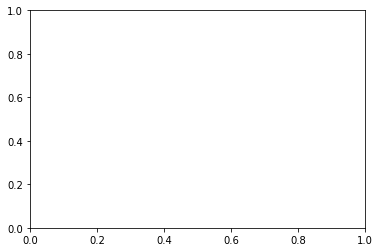

In [2]:
# square-animation.py
# 2018-12-05
# python3
# run on https://repl.it
# run on ubuntu 16.04 LTS
#
# 要執行本程式, 請按上方run▶
#
# 將多個圖檔組成一個動畫檔
# https://gifmaker.me/
#
%matplotlib inline
import matplotlib.pyplot as plot
from shapely import affinity
from shapely.geometry import LineString
#
# 定義圖面函數
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
    #
# end of def
#
# ------------------------------------------------------------
#
r0 = 10
tup7 = set_graphic_area(2*r0, 2*r0)  
# 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
fig = plot.figure(figsize=(tup7[0], tup7[1]))
# 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
# 設定X軸的顯示範圍, from xmin to xmax
plot.xlim(-tup7[6]/2, tup7[6]/2)
# 設定Y軸的顯示範圍, from ymin to ymax
plot.ylim(-tup7[6]/2, tup7[6]/2)
# get current axes, set X,Y same ratio & scale
plot.gca().set_aspect('equal', adjustable='box') 
ax.set_axis_on() # will turn on grid line
# ax.set_axis_off() # will turn off grid line
#
# --------------------------------------------------------------
#
R = 4
H = 0.5 * R
L = 0.5 * R
lightBlue   = ( 38/255, 185/255, 255/255)
lightPink   = (255/255,  94/255, 255/255)
lightGreen  = ( 94/255, 255/255,  94/255)
lightOrange = (255/255, 168/255, 111/255)
lightYellow = (255/255, 247/255,  74/255)
#
pA = ( H, H)
pB = (-H, H) 
pC = (-H,-H) 
pD = ( H,-H) 
square = LineString([pA, pB, pC, pD])
xs, ys = square.xy
ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightBlue, fill=True, zorder=10)
#
tx = 0
ty = R
square_U = affinity.translate(square, tx, ty, 0)
xs, ys = square_U.xy
ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightYellow, fill=True, zorder=10)
#
tx = -R
ty = 0
square_L = affinity.translate(square, tx, ty, 0)
xs, ys = square_L.xy
ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightOrange, fill=True, zorder=10)
#
tx = 0
ty = -R
square_D = affinity.translate(square, tx, ty, 0)
xs, ys = square_D.xy
ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightGreen, fill=True, zorder=10)
#
tx = R
ty = 0
square_R = affinity.translate(square, tx, ty, 0)
xs, ys = square_R.xy
ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightPink, fill=True, zorder=10)
#
ax.set_title('01', fontsize=22)
plot.savefig('01.png', format="png", dpi=72)
# 
for i in range(0, 91, 3) :
    # 設定圖面大小
    r0 = 10
    tup7 = set_graphic_area(2*r0, 2*r0)
    fig = plot.figure(figsize=(tup7[0], tup7[1]))
    ax = fig.add_subplot(1,1,1)
    fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
    #
    plot.xlim(-tup7[6]/2, tup7[6]/2)
    plot.ylim(-tup7[6]/2, tup7[6]/2)
    plot.gca().set_aspect('equal', adjustable='box') 
    ax.set_axis_off()
    #
    motif = affinity.rotate(square, i, (0,0))
    xs, ys = motif.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightBlue, fill=True, zorder=20)
    # -----------------------------------------
    new_pA = (xs[0], ys[0])
    new_tx0 = xs[0] - pA[0]
    new_ty0 = ys[0] - pA[1]
    #
    new_pB = (xs[1], ys[1])
    new_tx1 = xs[1] - pB[0]
    new_ty1 = ys[1] - pB[1]
    #
    new_pC = (xs[2], ys[2])
    new_tx2 = xs[2] - pC[0]
    new_ty2 = ys[2] - pC[1]
    #
    new_pD = (xs[3], ys[3])
    new_tx3 = xs[3] - pD[0]
    new_ty3 = ys[3] - pD[1]
    #    
    new_square_U = affinity.translate(square_U, new_tx0, new_ty0, 0)
    motif_U = affinity.rotate(new_square_U, -i, new_pA)
    xs, ys = motif_U.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightYellow, fill=True, zorder=20)
    #
    new_square_L = affinity.translate(square_L, new_tx1, new_ty1, 0)
    motif_L = affinity.rotate(new_square_L, -i, new_pB)
    xs, ys = motif_L.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightOrange, fill=True, zorder=20)
    #
    new_square_D = affinity.translate(square_D, new_tx2, new_ty2, 0)
    motif_D = affinity.rotate(new_square_D, -i, new_pC)
    xs, ys = motif_D.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightGreen, fill=True, zorder=20)
    #    
    new_square_R = affinity.translate(square_R, new_tx3, new_ty3, 0)
    motif_R = affinity.rotate(new_square_R, -i, new_pD)
    xs, ys = motif_R.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightPink, fill=True, zorder=20)
    #        
    if len(str(i)) == 1 :
       # ax.set_title('00'+str(i), fontsize=22)
       plot.savefig('motif/00'+str(i)+'.png', format="png", dpi=72)
    # end if
    if len(str(i)) == 2 :
       # ax.set_title('0'+str(i), fontsize=22) 
       plot.savefig('motif/0'+str(i)+'.png', format="png", dpi=72)
    # end if
    if len(str(i)) == 3 :
       # ax.set_title(str(i), fontsize=22)      
       plot.savefig('motif/'+str(i)+'.png', format="png", dpi=72)
    # end if
    plot.close('all')
    plot.cla()
# end for  
# ---------------------------------------------------------------
#
print ('Done')